# Self Organizing Maps: Travelling Salesman Problem
- Lionel Dsilva
- Unsupervised Machine Learning, Spring 2021
- Lewis University

## Outline:
A self organizing map (SOM) is an unsupervised learning method that is capable of being converted into a semi-supervised learning method, in the sene that they can be trained on a specific dataset and deployed to new data, just like any other supervised machine learning method. 
SOMs are aimed at reducing the dimensionality of a dataset it is applied to by mapping the data and clustering it based on the inherent characteristics they present - a bit like Principal Component Analysis. 
An SOM follows the following process when clustering data and training itself on said data:
- Node weights are initialized.
- A random vector is chosen from the dataset and inserted into the lattice.
- Every node is examined to calculate which weights are most akin to the input vector, after which a BMU or Best Matching Unit is selected.
- The radius of the neighbourhood is calculated (sigma), which starts large and set to the radius of the lattice and reduces by each iteration.
- The neighbouring node weights are updated to make them more like the input vector - the closer the node is to the BMU, the more it is adjusted.
- Repeat until all nodes are covered, or maximum iterations are reached.

A couple of notable differences between SOMs and other similar neural nets - the weights are not initialized with an activation function as in an artificial net (sigmoid, adam, etc.); they are random. The other difference is that the weights are not separate from the nodes. Each node has a weight that is directly proportional to the dimension of the dataset in question. If the dataset has 10 dimensions to it, each node will carry 10 weight values.

In this notebook, we use MiniSom to solve the Travelling Salesman Problem. The sigma parameter in the SOM object controls the radius from the BMU to the neighbouring nodes, which determines the number of surrounding nodes that would be updated.

### References:
- [Literature Reference]: https://medium.com/machine-learning-researcher/self-organizing-map-som-c296561e2117
- [Literature Reference]: https://www.superdatascience.com/blogs/the-ultimate-guide-to-self-organizing-maps-soms
- [Code Reference for TSP]: https://glowingpython.blogspot.com/2020/06/solving-travelling-salesman-problem.html
- [MiniSom documentation]: https://github.com/JustGlowing/minisom

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler

## SOM with MiniSom

In [2]:
'''
SOM function to solve TSP

Input: Takes a 2D dataframe of X and Y points, the number of datapoints in the dataset, dimension of
the dataset, sigma value, maximum iteratiions and random state to initialize from different datapoints
'''

def SOM(filename, n_dps, input_dims, sigma, iterations,rds):
    X = pd.read_csv(filename)
    mms = MinMaxScaler()
    X_scaled = mms.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=['X','Y'])
    x_points = X_scaled['X'].values
    y_points = X_scaled['Y'].values
    n_points = n_dps # number of points in the set
    n_neurons = n_points * 2
    all_points = np.array([x_points,y_points]).T
    
    # path lists to plot diagram
    path_x = []
    path_y = []
    
    # instantiate som object
    som = MiniSom(1, n_neurons*2, input_dims, sigma=sigma, neighborhood_function='gaussian',random_seed=rds)
    # get weights at random
    som.random_weights_init(all_points)
    
    # for loop to update and visit points
    for i in np.arange(iterations):
        ipoint = i % len(all_points)
        som.update(all_points[ipoint], som.winner(all_points[ipoint]), i, iterations)
        visit_order = np.argsort([som.winner(p)[1] for p in all_points])
        visit_order = np.concatenate((visit_order, [visit_order[0]]))
        path_x.append(all_points[visit_order][:,0])
        path_y.append(all_points[visit_order][:,1])
    
    # Plot diagram and get animation (animation for fun)
    fig, ax = plt.subplots(figsize=(10,10))
    plt.scatter(x_points, y_points, label='points visited')
    line, = plt.plot([], [], 'C3', linewidth=2, label='path')
    plt.legend()
    
    def update(frame):
        line.set_data(path_x[frame], path_y[frame])
        plt.title('Iteration = %d' % frame)
        return line, 
    
    anim = FuncAnimation(fig, update, frames=np.arange(iterations), 
                         interval=100, repeat=False, blit=False)
    vid = HTML(anim.to_html5_video())
    return vid, path_x, path_y

D:\Anaconda\envs\MDL\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


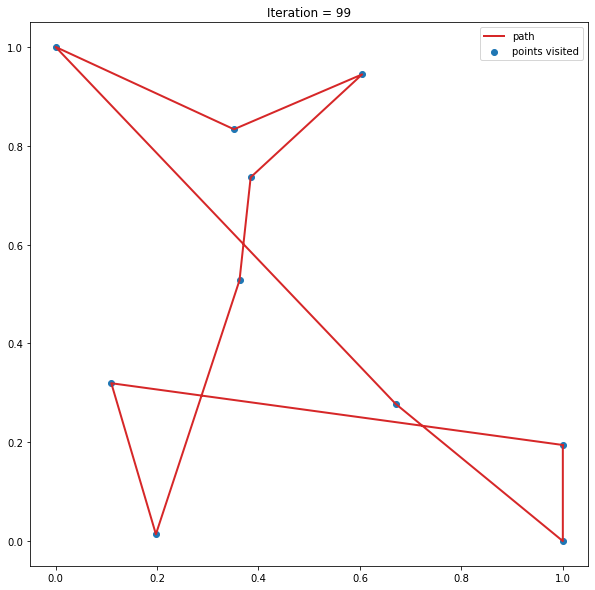

In [3]:
anim, _, _ = SOM('C:/Users/ldmag/Desktop/Desktop Icons/Datasets/som_data.csv', 10, 2, 5, 100,42)

D:\Anaconda\envs\MDL\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


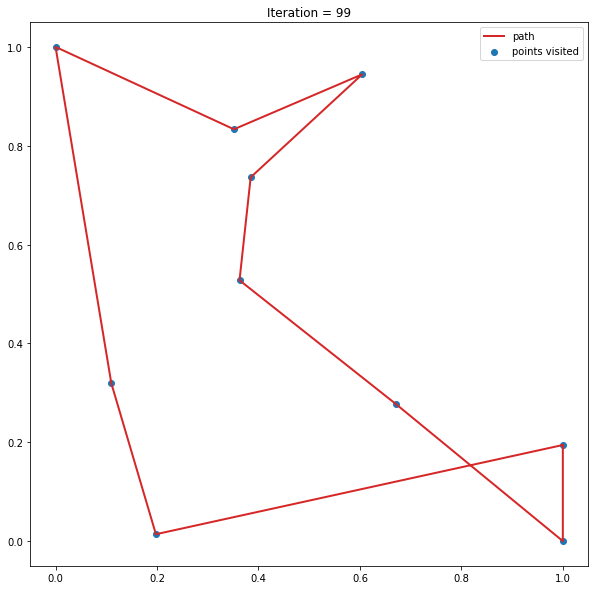

In [4]:
# same SOM with a different initial start point
anim1, _, _ = SOM('C:/Users/ldmag/Desktop/Desktop Icons/Datasets/som_data.csv', 10, 2, 5, 100,1)

##### Note: MiniSom parameter 'sigma' is the spread (radius) of the neighbourhood function. 

### MiniSom covering +/- 2 neighbours (spread = 5)

D:\Anaconda\envs\MDL\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


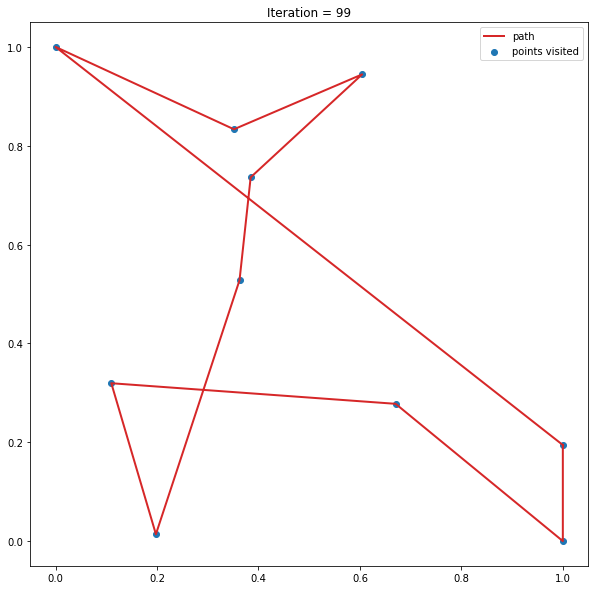

In [5]:
anim2, _, _ = SOM('C:/Users/ldmag/Desktop/Desktop Icons/Datasets/som_data.csv', 10, 2, 5, 100,32)

### MiniSom covering +/- 1 neighbour (spread = 3)

D:\Anaconda\envs\MDL\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


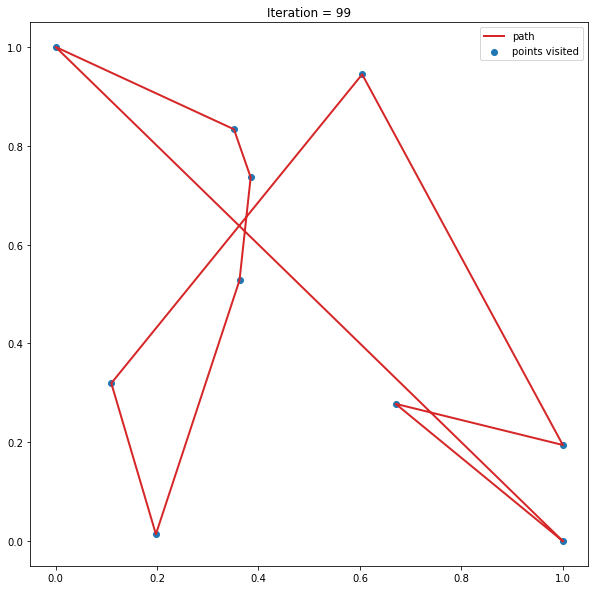

In [6]:
anim3, _, _ = SOM('C:/Users/ldmag/Desktop/Desktop Icons/Datasets/som_data.csv', 10, 2, 3, 100,32)

### MiniSom covering 0 neighbours (spread = 1; winning neuron)

D:\Anaconda\envs\MDL\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


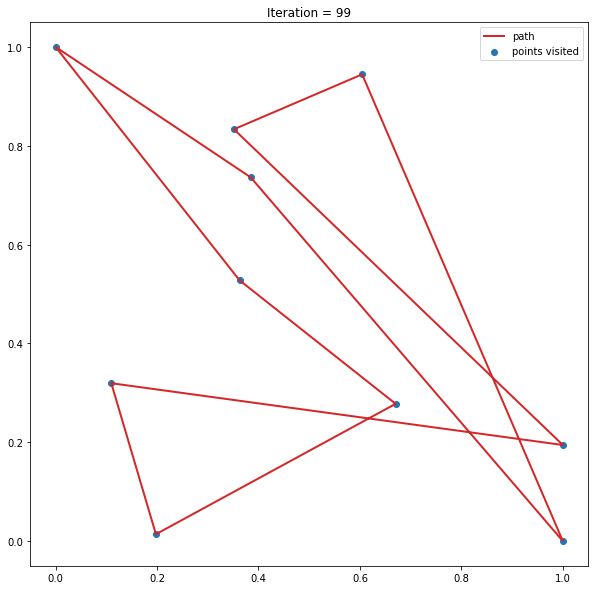

In [7]:
anim4, _, _ = SOM('C:/Users/ldmag/Desktop/Desktop Icons/Datasets/som_data.csv', 10, 2, 1, 100,32)

### SOM with different dataset; best fit
There are 15 datapoints in this set, so the optimal sigma would be half of that; where the radius of the neighbourhood function at a given time would be a spread of 7 neurons.

D:\Anaconda\envs\MDL\lib\site-packages\minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


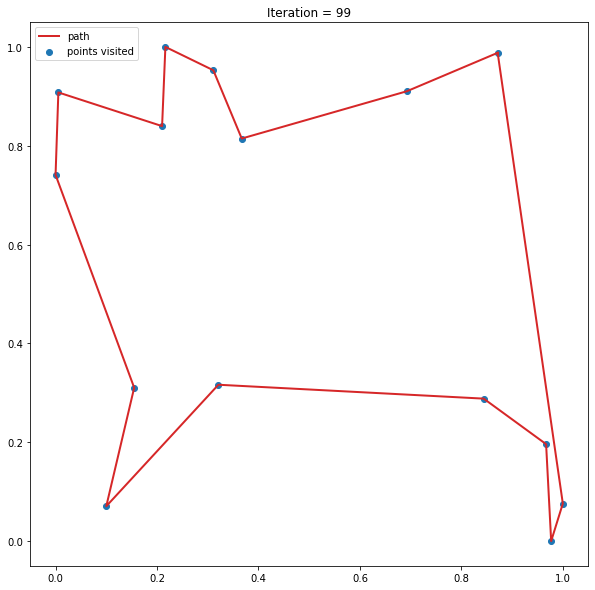

In [8]:
anim5, _, _ = SOM('C:/Users/ldmag/Desktop/Desktop Icons/Datasets/som_data2.csv', 15, 2, 7.5, 100,0)

## Analysis:
The results produced here change with the random seed (inital points) and the sigma value. As a general rule of thumb, a good sigma value would be approximately half of the number of datapoints in the dataset, so if a dataset has 30 datapoints - the spread of the neighbourhood function is optimally a value of 15. 
Generally, it appears that only updating the value of the winning node does not give us an optimal path that would satisfy the condition that the paths to each destination do not cross each other. Updating the neighbour weights produces better results, as each node is transformed to mimic the values of the input vectors. This would intrinsically provide us with results where paths do not cross each other. 

There does not appear to be a 'correct' answer to the problem, as there are many solutions that would be more optimal than the last - or at the very least, appear to be.

Note: See video attached in submission for the change in paths for each iteration. 

In [9]:
anim

In [10]:
anim1

In [11]:
anim2

In [12]:
anim3

In [13]:
anim4

In [14]:
anim5